# Setting up Paths

In [6]:
#path to the data
pathCOMPASOutput = '/Volumes/Virgo/DATA/BHNS/Fiducial/'
#path to compasrepo which contains ther popsynth folder
# pathRepo = '/home/cneijssel/Documents/COMPASpop'
# pathPostProcessing = '/home/cneijssel/Documents/COMPASpop/popsynth/Papers/NeijsselEtAL/PostProcessing'


# Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('../../Scripts')
# sys.path.append(pathPostProcessing+'/2_CosmicIntegration')

# Custom Imports from COMPASrepo

In [8]:
import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
import coencodeVarious as CV



NameError: name 'np' is not defined

# The Cosmic integrator class

In [12]:
#Again I make a generic instance without DCO type
#will need to set this manually with the MSSFR later

#Want to show cosmic scale so high redshift
#Large number of shells for smooth lines
minz = 0.
maxz = 6.
resz = 100
Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput,\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz)

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
()
cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 


# PAPER PLOT

In [47]:
from PostProcessingScripts import * 


NSNSrate0 = [250,2810] # Gpc-3 yr-1 from: https://arxiv.org/pdf/2001.01761.pdf
BHBHrate0 = [9.7,101] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf
BHNSrate0 = [0,610] # Gpc-3 yr-1 from: https://arxiv.org/pdf/1811.12907.pdf 




['A.0.0.0', 'A.1.1.1', 'A.2.1.1', 'A.3.1.1', 'A.1.1.2', 'A.2.1.2', 'A.3.1.2', 'A.1.1.3', 'A.2.1.3', 'A.3.1.3', 'A.1.2.1', 'A.2.2.1', 'A.3.2.1', 'A.1.2.2', 'A.2.2.2', 'A.3.2.2', 'A.1.2.3', 'A.2.2.3', 'A.3.2.3', 'A.1.3.1', 'A.2.3.1', 'A.3.3.1', 'A.1.3.2', 'A.2.3.2', 'A.3.3.2', 'A.1.3.3', 'A.2.3.3', 'A.3.3.3']


BBH
rate BBH at redshift 0 for .0.0.0  = 26.125820535959235
rate BBH at redshift 0 for .1.1.1  = 291.8102236673361
rate BBH at redshift 0 for .2.1.1  = 361.5895535774661
rate BBH at redshift 0 for .1.1.3  = 31.870574880915093
BHNS
rate BHNS at redshift 0 for .0.0.0  = 28.8584618056583
rate BHNS at redshift 0 for .1.1.1  = 142.96735082560195
rate BHNS at redshift 0 for .2.1.1  = 147.19333926008844
rate BHNS at redshift 0 for .1.1.3  = 46.80673102071428
BNS
rate BNS at redshift 0 for .0.0.0  = 39.89378832675089
rate BNS at redshift 0 for .1.1.1  = 111.51615562012717
rate BNS at redshift 0 for .2.1.1  = 112.1866440396981
rate BNS at redshift 0 for .1.1.3  = 59.86549862264812


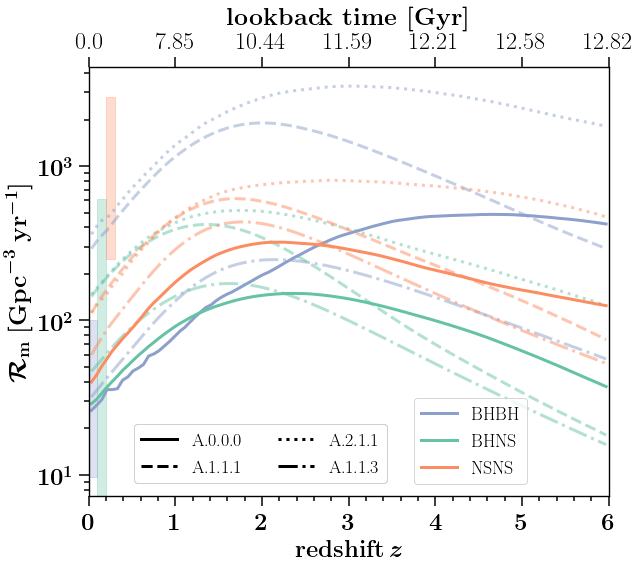

In [130]:
#The distribution of DCOs as a function of redshift



method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Strolger et al. (2004)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Panter et al. (2004) Single' , 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['.0.0.0'                 , '.1.1.1'                    , '.2.1.1'                     , '.1.1.3']
modellabels = ['A']

cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]
Colours = ['#8da0cb','#66c2a5','#fc8d62']
#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
handles1  = []
Types      = ['BBH', 'BHNS', 'BNS']
TypesLabels      = ['BHBH', 'BHNS', 'NSNS']
for nrT, Type in enumerate(Types):
    print(Type)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.setBirthTimesAnd2Darrays()
    for nrL, L in enumerate(labels):
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        Data.cosmologicalIntegration()

        PerSystemPerRedshift_ratesIntrinsic_weighted =\
        np.zeros_like(Data.PerSystemPerRedshift_ratesIntrinsic)
        for ind_z in range(len(Data.PerSystemPerRedshift_ratesIntrinsic)):
                PerSystemPerRedshift_ratesIntrinsic_weighted[ind_z] =\
                Data.PerSystemPerRedshift_ratesIntrinsic[ind_z,:] * Data.COMPAS.weight

        DCOperRedshift = np.sum(PerSystemPerRedshift_ratesIntrinsic_weighted, axis=1)
#         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
        Redshifts      = Data.Shell_centerRedshift
        
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        #only want a label for DCO type  once when we have solid line
        #if nrL != 3: #Dont Ma et al for clarity
        if nrL == 0:
            label = TypesLabels[nrT]
            ll    = True
        else:
            label = None
            ll    = False
            ALPHA = 0.5
        if ll:
            l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL], alpha=ALPHA)
            


from   astropy.cosmology import WMAP9 #as cosmo


# make second axis with lookback time:
xlabel2 = r'$\textbf{lookback time [Gyr]}$'
ax2y = axes.twiny()
x_z = np.linspace(0,6,7) # range redshift
x_lookbacktime = np.round(cosmo.lookback_time(x_z).value,2)
# ax2y.set_xlim(np.min(x_lookbacktime),np.max(x_lookbacktime))
# # ax2y.set_xscale('log')

ax2y.tick_params(labelsize=fs)
ax2y = CV.layoutAxes(ax2y, nameX=xlabel2, second=True) #, nameY=nameY)
# ax2y.set_xlim(np.min(x_lookbacktime),np.max(x_lookbacktime))
ax2y.set_xticks(x_z)
        # Set the tick labels
ax2y.set_xticklabels(x_lookbacktime)

# secax = axes.set_secondary_xaxis('top', functions=(mirrir, mirror))




# add rate limits from GW observations:
xmin, xmax = 0,0.1
for ind_R, obs_rate in enumerate([BHBHrate0, BHNSrate0, NSNSrate0]):
    xx = np.linspace(xmin,xmax,10)
    xmin +=0.1
    xmax+=0.1
    axes.fill_between(xx, np.ones_like(xx)*[obs_rate[0]], np.ones_like(xx)*[obs_rate[1]], alpha=0.3, color=Colours[ind_R])

    
first_legend = axes.legend(handles=handles1,  prop={'size':18}, ncol=1, bbox_to_anchor=(.86, .25))   
axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    LABEL = modellabels[0]+ L
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=LABEL, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, bbox_to_anchor=(.59, .19), prop={'size':18}, ncol=2)   
axes.add_artist(second_legend) 
axes.set_xlim(0,6)

nameX = r'$\textbf{redshift} \, z $'
nameY = r'$\mathcal{R}_{\rm{m}} \ [\rm{Gpc}^{-3} \  \rm{yr}^{-1}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)

axes.yaxis.set_minor_locator(AutoMinorLocator())
axes.xaxis.set_minor_locator(AutoMinorLocator())

axes.tick_params(labelsize=fs)

axes.set_xlabel(nameX, fontsize=fs)


axes.set_yscale('log')
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshift_4_MSSFRs_ALPHA.png', dpi=300, transparent=False)
plt.show()
plt.close()

In [50]:
from   astropy.cosmology import FlatLambdaCDM
from   astropy.cosmology import WMAP9 #as cosmo
cosmo           = WMAP9

print(cosmo.H0)
print(cosmo.Odm0)
print(cosmo.Ode0)
print(cosmo.Ogamma0)
print(cosmo.Ob0)

print(cosmo.lookback_time(11000).value)

from matplotlib.ticker import AutoMinorLocator, MultipleLocator
minor = AutoMinorLocator()

69.32 km / (Mpc s)
0.24022
0.713413071905
5.14243810067e-05
0.04628
13.7688935977


In [88]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

In [66]:
x_z = np.linspace(0,6,10) # range redshift
x_lookbacktime = cosmo.lookback_time(x_z).value

print(x_lookbacktime[0])
print(x_lookbacktime[2])

0.0
8.992926808490326


# FIDUCIAL + FIDUCIAL 


In [10]:
# General settings colours DCO types consistent with other notebooks
Types      = ['BBH', 'BHNS', 'BNS']
# Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

BBH
rate BBH at redshift 0 for .0.0.0  = 26.125820535959235
BHNS
rate BHNS at redshift 0 for .0.0.0  = 28.8584618056583
BNS
rate BNS at redshift 0 for .0.0.0  = 39.89378832675089


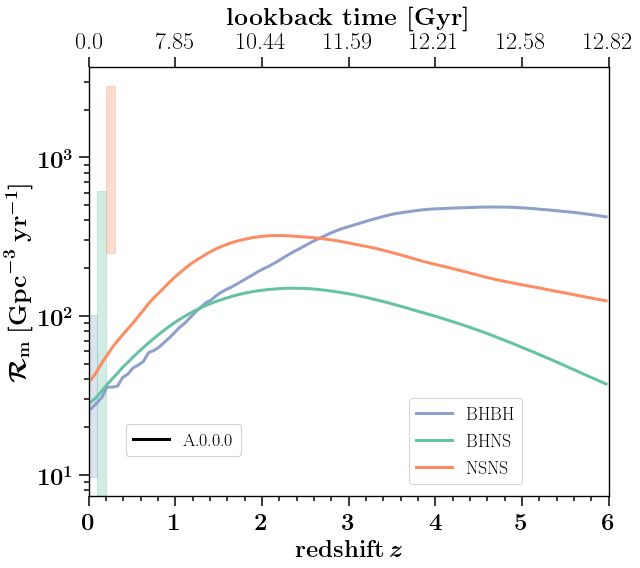

In [123]:
#The distribution of DCOs as a function of redshift



method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Strolger et al. (2004)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Panter et al. (2004) Single' , 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['.0.0.0' ]#                , '.1.1.1'                    , '.2.1.1'                     , '.1.1.3']
modellabels = ['A']

cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]
Colours = ['#8da0cb','#66c2a5','#fc8d62']
#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
handles1  = []
Types      = ['BBH', 'BHNS', 'BNS']
for nrT, Type in enumerate(Types):
    print(Type)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.setBirthTimesAnd2Darrays()
    for nrL, L in enumerate(labels):
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        Data.cosmologicalIntegration()

        PerSystemPerRedshift_ratesIntrinsic_weighted =\
        np.zeros_like(Data.PerSystemPerRedshift_ratesIntrinsic)
        for ind_z in range(len(Data.PerSystemPerRedshift_ratesIntrinsic)):
                PerSystemPerRedshift_ratesIntrinsic_weighted[ind_z] =\
                Data.PerSystemPerRedshift_ratesIntrinsic[ind_z,:] * Data.COMPAS.weight

        DCOperRedshift = np.sum(PerSystemPerRedshift_ratesIntrinsic_weighted, axis=1)
#         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
        Redshifts      = Data.Shell_centerRedshift
        
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        #only want a label for DCO type  once when we have solid line
        #if nrL != 3: #Dont Ma et al for clarity
        if nrL == 0:
            label = TypesLabels[nrT]
            ll    = True
        else:
            label = None
            ll    = False
        if ll:
            l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
            





# make second axis with lookback time:
from   astropy.cosmology import WMAP9 #as cosmo
xlabel2 = r'$\textbf{lookback time [Gyr]}$'
ax2y = axes.twiny()
x_z = np.linspace(0,6,7) # range redshift
x_lookbacktime = np.round(cosmo.lookback_time(x_z).value,2)

ax2y.tick_params(labelsize=fs)
ax2y.set_xlabel(xlabel2, fontsize=fs) 
ax2y = CV.layoutAxes(ax2y, nameX=xlabel2, second=True) #, nameY=nameY)
ax2y.set_xticks(x_z)
 # Set the tick labels
ax2y.set_xticklabels(x_lookbacktime)


# add rate limits from GW observations:
xmin, xmax = 0,0.1
for ind_R, obs_rate in enumerate([BHBHrate0, BHNSrate0, NSNSrate0]):
    xx = np.linspace(xmin,xmax,10)
    xmin +=0.1
    xmax+=0.1
    axes.fill_between(xx, np.ones_like(xx)*[obs_rate[0]], np.ones_like(xx)*[obs_rate[1]], alpha=0.3, color=Colours[ind_R])
    

# plot DCO type legend
first_legend = axes.legend(handles=handles1,  prop={'size':18}, ncol=1, bbox_to_anchor=(.85, .25))   
axes.add_artist(first_legend) 




# plot legend of MSSFR variations:
handles2 = []
for nrL, L in enumerate(labels):
    LABEL = modellabels[0]+ L
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=LABEL, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, bbox_to_anchor=(.31, .19), prop={'size':18}, ncol=2)   
axes.add_artist(second_legend) 
axes.set_xlim(0,6)

# labels and axes :
nameX = r'$\textbf{redshift} \, z $'
nameY = r'$\mathcal{R}_{\rm{m}} \ [  \rm{Gpc}^{-3} \ \rm{yr}^{-1}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)

axes.yaxis.set_minor_locator(AutoMinorLocator())
axes.xaxis.set_minor_locator(AutoMinorLocator())

axes.tick_params(labelsize=fs)

axes.set_xlabel(nameX, fontsize=fs)

axes.set_yscale('log')
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshift_A000.png', dpi=300, transparent=False)
plt.show()
plt.close()

In [2]:

# Found the solution to this a bit later (note that it does not work in pycharm jupyter, but only in the browser implementation). For me print works fine, but here display is advised, but it prints apostrophes around strings.

from time import sleep
from IPython.display import clear_output, display

for f in range(10):
    clear_output(wait=True)
    print(f)  # use display(f) if you encounter performance issues
    sleep(1)

9


# Fiducial + Coen's model variations

BBH
rate BBH at redshift 0 for Preferred model  = 26.125820535959235
rate BBH at redshift 0 for Barrett et al. (2018) MSSFR  = 291.8102236673361
rate BBH at redshift 0 for Furlong et al. (2015) Single  = 373.8486586924337
rate BBH at redshift 0 for Ma et al. (2015)  = 31.870574880915093
BHNS
rate BHNS at redshift 0 for Preferred model  = 28.8584618056583
rate BHNS at redshift 0 for Barrett et al. (2018) MSSFR  = 142.96735082560195


KeyboardInterrupt: 

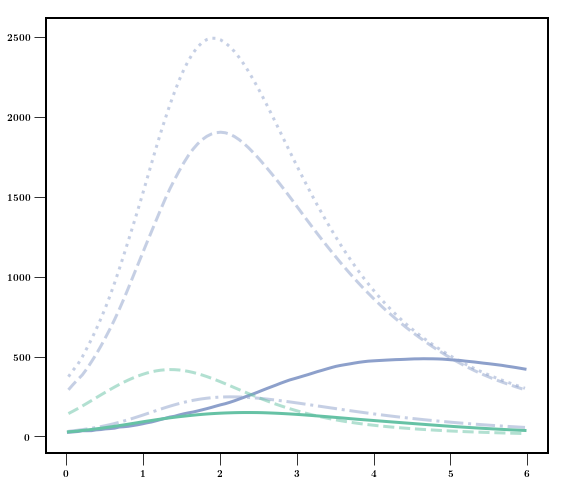

In [128]:
#The distribution of DCOs as a function of redshift

method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]
Colours = ['#8da0cb','#66c2a5','#fc8d62']
#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
handles1  = []
for nrT, Type in enumerate(Types):
    print(Type)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.setBirthTimesAnd2Darrays()
    for nrL, L in enumerate(labels):
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        Data.cosmologicalIntegration()

        PerSystemPerRedshift_ratesIntrinsic_weighted =\
        np.zeros_like(Data.PerSystemPerRedshift_ratesIntrinsic)
        for ind_z in range(len(Data.PerSystemPerRedshift_ratesIntrinsic)):
                PerSystemPerRedshift_ratesIntrinsic_weighted[ind_z] =\
                Data.PerSystemPerRedshift_ratesIntrinsic[ind_z,:] * Data.COMPAS.weight

        DCOperRedshift = np.sum(PerSystemPerRedshift_ratesIntrinsic_weighted, axis=1)
#         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
        Redshifts      = Data.Shell_centerRedshift
        
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        #only want a label for DCO type  once when we have solid line
        #if nrL != 3: #Dont Ma et al for clarity
        if nrL == 0:
            label = Type
            ll    = True
            ALPHA = 1
        else:
            label = None
            ll    = False
            ALPHA = 0.5
        if ll:
            l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL], alpha=ALPHA)
            

            
            
first_legend = axes.legend(handles=handles1, loc='center right',  prop={'size':18}, ncol=1, bbox_to_anchor=(1., .11))   
axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, loc=8,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 
axes.set_xlim(0,6)

nameX = r'$\rm redshift $'
nameY = r'$\rm dN_{merge}/(dt_{s}dV_{c})\ [ yr^{-1}\ Gpc^{-3}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_yscale('log')
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshift_ALL_MSSFR.png', dpi=300, transparent=False)
plt.show()
plt.close()

# Only BHNS & NSNS

In [5]:
# General settings colours DCO types consistent with other notebooks
Types      = ['BBH', 'BHNS', 'BNS']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

BHNS
()
20
1366530
----
(20, 1366530)
---
rate BHNS at redshift 0 for Preferred model  = 38.23040139637014
()
20
1366530
----
(20, 1366530)
---
rate BHNS at redshift 0 for Barrett et al. (2018) MSSFR  = 196.59883580752103
()
20
1366530
----
(20, 1366530)
---
rate BHNS at redshift 0 for Furlong et al. (2015) Single  = 187.24163903535265
()
20
1366530
----
(20, 1366530)
---
rate BHNS at redshift 0 for Ma et al. (2015)  = 63.319957307257845
BNS
()
20
38183
----
(20, 38183)
---
rate BNS at redshift 0 for Preferred model  = 57.255665901314394
()
20
38183
----
(20, 38183)
---
rate BNS at redshift 0 for Barrett et al. (2018) MSSFR  = 161.90364091270158
()
20
38183
----
(20, 38183)
---
rate BNS at redshift 0 for Furlong et al. (2015) Single  = 160.84153613524063
()
20
38183
----
(20, 38183)
---
rate BNS at redshift 0 for Ma et al. (2015)  = 87.87636820795903


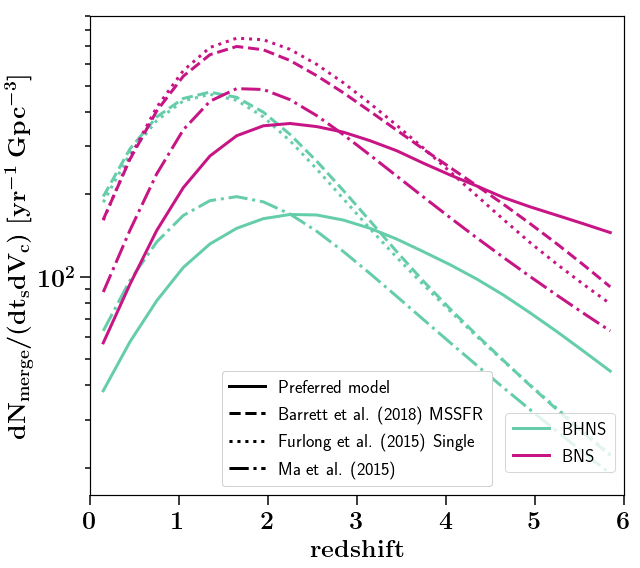

In [31]:
#The distribution of DCOs as a function of redshift

method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]

#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
handles1  = []
for nrT, Type in enumerate(Types):
    print(Type)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.setBirthTimesAnd2Darrays()
    for nrL, L in enumerate(labels):
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        Data.cosmologicalIntegration()
#         print()
#         print(len(Data.PerSystemPerRedshift_ratesIntrinsic))
#         print(len(Data.COMPAS.weight))
#         print('----')
#         print(np.shape(Data.PerSystemPerRedshift_ratesIntrinsic))
#         print('---')
        
        PerSystemPerRedshift_ratesIntrinsic_weighted =\
        np.zeros_like(Data.PerSystemPerRedshift_ratesIntrinsic)
        for ind_z in range(len(Data.PerSystemPerRedshift_ratesIntrinsic)):
                PerSystemPerRedshift_ratesIntrinsic_weighted[ind_z] =\
                Data.PerSystemPerRedshift_ratesIntrinsic[ind_z,:] * Data.COMPAS.weight

        DCOperRedshift = np.sum(PerSystemPerRedshift_ratesIntrinsic_weighted, axis=1)
#         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
        Redshifts      = Data.Shell_centerRedshift
        
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        #only want a label for DCO type  once when we have solid line
        #if nrL != 3: #Dont Ma et al for clarity
        if nrL == 0:
            label = Type
            ll    = True
        else:
            label = None
            ll    = False
        if ll:
            l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
        #if (nrL == 3) and (Type =='BBH'): #Dont Ma et al for clarity
        #    print('?')
        #    if nrL == 0:
        #        label = Type
        #        ll    = True
        #    else:
        #        label = None
        #        ll    = False
        #    if ll:
        #        l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
        #             c=Colours[nrT], linestyle=linestyles[nrL])
        #        handles1.extend(l)
        #    else:
        #        axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
        #             c=Colours[nrT], linestyle=linestyles[nrL])
first_legend = axes.legend(handles=handles1, loc='center right',  prop={'size':18}, ncol=1, bbox_to_anchor=(1., .11))   
axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, loc=8,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 
axes.set_xlim(0,6)

nameX = r'$\rm redshift $'
nameY = r'$\rm dN_{merge}/(dt_{s}dV_{c})\ [ yr^{-1}\ Gpc^{-3}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_yscale('log')
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshift_all.png', dpi=300, transparent=False)
plt.show()
plt.close()

BHNS
rate BHNS at redshift 0 for Preferred model  = 38.23040139637014
rate BHNS at redshift 0 for Barrett et al. (2018) MSSFR  = 196.59883580752103
rate BHNS at redshift 0 for Furlong et al. (2015) Single  = 187.24163903535265
rate BHNS at redshift 0 for Ma et al. (2015)  = 63.319957307257845
BNS
rate BNS at redshift 0 for Preferred model  = 57.255665901314394
rate BNS at redshift 0 for Barrett et al. (2018) MSSFR  = 161.90364091270158
rate BNS at redshift 0 for Furlong et al. (2015) Single  = 160.84153613524063
rate BNS at redshift 0 for Ma et al. (2015)  = 87.87636820795903


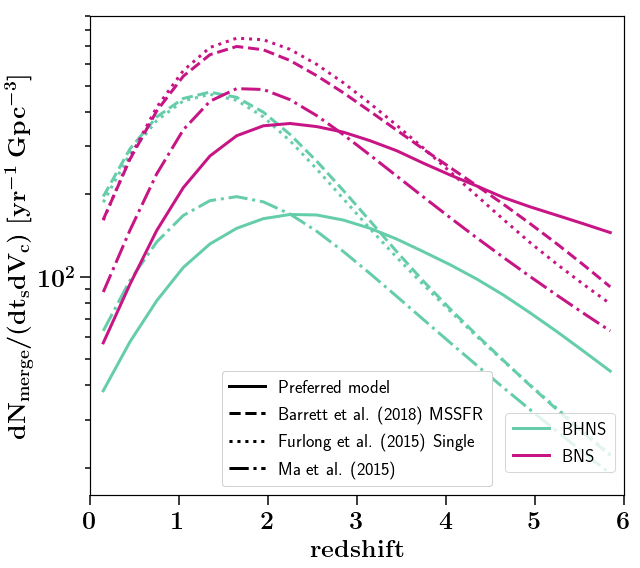

In [30]:
#The distribution of DCOs as a function of redshift

method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]


Types      = ['BHNS', 'BNS']
Colours    = ['mediumaquamarine','mediumvioletred' ]

#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
handles1  = []
for nrT, Type in enumerate(Types):
    print(Type)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.setBirthTimesAnd2Darrays()
    for nrL, L in enumerate(labels):
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        Data.cosmologicalIntegration()

        # weights // floor 
        PerSystemPerRedshift_ratesIntrinsic_weighted =\
        np.zeros_like(Data.PerSystemPerRedshift_ratesIntrinsic)
        for ind_z in range(len(Data.PerSystemPerRedshift_ratesIntrinsic)):
                PerSystemPerRedshift_ratesIntrinsic_weighted[ind_z] =\
                Data.PerSystemPerRedshift_ratesIntrinsic[ind_z,:] * Data.COMPAS.weight

        DCOperRedshift = np.sum(PerSystemPerRedshift_ratesIntrinsic_weighted, axis=1)
        # weights // floor (everything in between)
        
#         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
        Redshifts      = Data.Shell_centerRedshift
        
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        #only want a label for DCO type  once when we have solid line
        #if nrL != 3: #Dont Ma et al for clarity
        if nrL == 0:
            label = Type
            ll    = True
        else:
            label = None
            ll    = False
        if ll:
            l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
            handles1.extend(l)
        else:
            axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                 c=Colours[nrT], linestyle=linestyles[nrL])
        #if (nrL == 3) and (Type =='BBH'): #Dont Ma et al for clarity
        #    print('?')
        #    if nrL == 0:
        #        label = Type
        #        ll    = True
        #    else:
        #        label = None
        #        ll    = False
        #    if ll:
        #        l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
        #             c=Colours[nrT], linestyle=linestyles[nrL])
        #        handles1.extend(l)
        #    else:
        #        axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
        #             c=Colours[nrT], linestyle=linestyles[nrL])
first_legend = axes.legend(handles=handles1, loc='center right',  prop={'size':18}, ncol=1, bbox_to_anchor=(1., .11))   
axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, loc=8,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 
axes.set_xlim(0,6)

nameX = r'$\rm redshift $'
nameY = r'$\rm dN_{merge}/(dt_{s}dV_{c})\ [ yr^{-1}\ Gpc^{-3}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_yscale('log')
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshift_onlyBHNS_and_NSNS.png', dpi=300, transparent=False)
plt.show()
plt.close()

BHNS
rate BHNS at redshift 0 for Preferred model  = 33.99707738087709
rate BHNS at redshift 0 for Barrett et al. (2018) MSSFR  = 174.82907816325584
rate BHNS at redshift 0 for Furlong et al. (2015) Single  = 166.50802133120015
rate BHNS at redshift 0 for Ma et al. (2015)  = 56.308419731451465
BNS
rate BNS at redshift 0 for Preferred model  = 50.91563868135183
rate BNS at redshift 0 for Barrett et al. (2018) MSSFR  = 143.9757472407146
rate BNS at redshift 0 for Furlong et al. (2015) Single  = 143.03125131634363
rate BNS at redshift 0 for Ma et al. (2015)  = 78.14565321828108


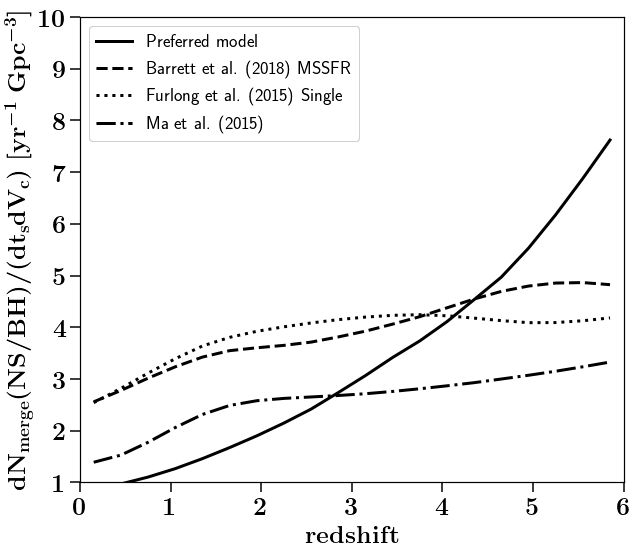

In [48]:
#The distribution of DCOs as a function of redshift

method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]


Types      = ['BHNS', 'BNS']
Colours    = ['mediumaquamarine','mediumvioletred' ]

#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
handles1  = []
for nrT, Type in enumerate(Types):
    print(Type)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    Data.COMPAS.setCOMPASData()
    Data.setBirthTimesAnd2Darrays()
    

    for nrL, L in enumerate(labels):
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        Data.cosmologicalIntegration()

        # weights // floor 
        PerSystemPerRedshift_ratesIntrinsic_weighted =\
        np.zeros_like(Data.PerSystemPerRedshift_ratesIntrinsic)
        for ind_z in range(len(Data.PerSystemPerRedshift_ratesIntrinsic)):
                PerSystemPerRedshift_ratesIntrinsic_weighted[ind_z] =\
                Data.PerSystemPerRedshift_ratesIntrinsic[ind_z,:] * Data.COMPAS.weight

        DCOperRedshift = np.sum(PerSystemPerRedshift_ratesIntrinsic_weighted, axis=1)
        # weights // floor (everything in between)
        
#         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
        Redshifts      = Data.Shell_centerRedshift
        
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        #only want a label for DCO type  once when we have solid line
        #if nrL != 3: #Dont Ma et al for clarity
        if nrL == 0:
            label = Type
            ll    = False #True
        else:
            label = None
            ll    = False
            
        if Type=='BHNS':
            BHNS_DCOperRedshift = DCOperRedshift
            
        else:    
            if ll:
                l = axes.plot(Redshifts, DCOperRedshift/BHNS_DCOperRedshift, label=label,lw=3.,\
                     c='k', linestyle=linestyles[nrL])
                handles1.extend(l)
            else:
                axes.plot(Redshifts, DCOperRedshift/BHNS_DCOperRedshift, label=label,lw=3.,\
                     c='k', linestyle=linestyles[nrL])

first_legend = axes.legend(handles=handles1, loc='center right',  prop={'size':18}, ncol=1, bbox_to_anchor=(1., .11))   
# axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, loc=0,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 
axes.set_xlim(0,6)
axes.set_ylim(1,10)

nameX = r'$\rm redshift $'
nameY = r'$\rm dN_{merge}(NS/BH) /(dt_{s}dV_{c})\ [ yr^{-1}\ Gpc^{-3}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
# axes.set_yscale('log')
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshift_onlyBHNS_and_NSNS_ratio_temp.png', dpi=300, transparent=False)
plt.show()
plt.close()

# different models

not reaching Optimistic
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
()
cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 
BHNS
rate BHNS at redshift 0 for Preferred model  = 33.6177335839238
rate BHNS at redshift 0 for Barrett et al. (2018) MSSFR  = 172.87831264346468
rate BHNS at redshift 0 for Furlong et al. (2015) Single  = 164.65010324232097
rate BHNS at redshift 0 for Ma et al. (2015)  = 55.68012308400546
BNS
rate BNS at redshift 0 for Preferred model  = 50.347515384007764
rate BNS at redshift 0 for Barrett et al. (2018) MSSFR  = 142.3692471873248
rate BNS at redshift 0 for Furlong et al. (2015) Single  = 141.4352900709267
rate BNS at redshift 0 for Ma et al. (2015)  = 77.27369388850967
not reaching Optimistic
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
()
cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 
BHNS
rate BHNS at redshift 0 for Preferred 

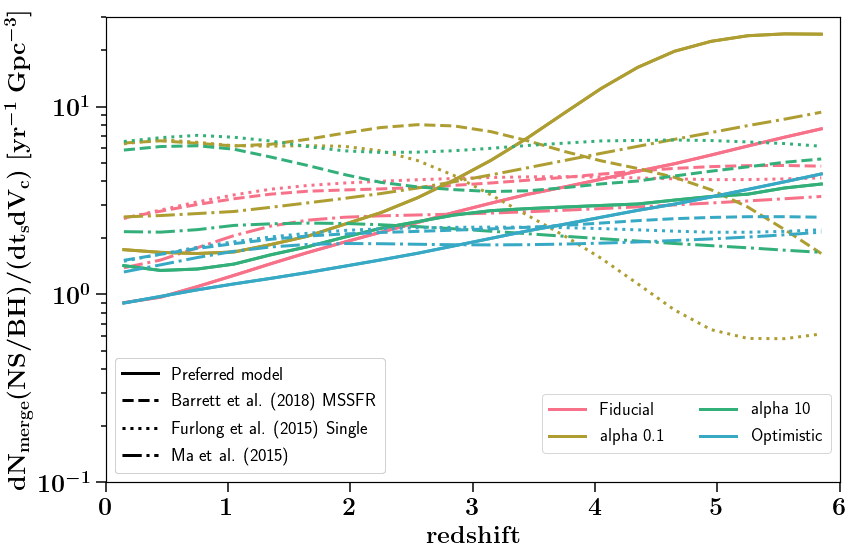

In [53]:
import seaborn as sns
colors_Z = sns.color_palette("husl", nColors)


  
modelnames = ['Fiducial', 'alpha 0.1', 'alpha  10', 'Optimistic']
modelpaths = ['/Volumes/Virgo/DATA/BHNS/Fiducial/', '/Volumes/Virgo/DATA/BHNS/alpha0_1/',\
              '/Volumes/Virgo/DATA/BHNS/alpha_10/', '/Volumes/Virgo/DATA/BHNS/Fiducial/']
modelcolours = sns.color_palette("husl", len(modelnames))
modelcolours = sns.color_palette("husl", 5) 

#The distribution of DCOs as a function of redshift


cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]




Types      = ['BHNS', 'BNS']
Colours    = ['mediumaquamarine','mediumvioletred' ]





#Setting DCO types takes the longest so first loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(12,8))
handles1  = []

for ind_m, modelname in enumerate(modelnames):
    # optimistic is a subset of Fiducial
    if modelname=='Optimistic':
        print('reaching Optimistic')
        Data = CI.CosmicIntegrator(COMPASpath = modelpaths[ind_m],\
                                   minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz,\
                                   withinHubbleTime=True, optimistic=True,\
                                   COMPASbinaryFraction=0.6)         
    else:
        print('not reaching Optimistic')
        Data = CI.CosmicIntegrator(COMPASpath = modelpaths[ind_m],\
               minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz,\
                                   withinHubbleTime=True, optimistic=False,\
                                  COMPASbinaryFraction=0.6)    
    for nrT, Type in enumerate(Types):
        print(Type)
        if modelname=='Optimistic':
            Data.COMPAS.setCOMPASDCOmask(types=Type, optimistic=True,withinHubbleTime=True)
        else:
            Data.COMPAS.setCOMPASDCOmask(types=Type, optimistic=False,withinHubbleTime=True)
            
        Data.COMPAS.setCOMPASData()
        Data.setBirthTimesAnd2Darrays()


        for nrL, L in enumerate(labels):
            Data.MSSFR.Zprescription         = method[nrL]
            Data.MSSFR.SFRprescription       = SFRs[nrL]
            Data.MSSFR.logNormalPrescription = logNormal[nrL]
            Data.MSSFR.GSMFprescription      = GSMFs[nrL]
            Data.MSSFR.ZMprescription        = MZs[nrL]
            Data.cosmologicalIntegration()

            # weights // floor 
            PerSystemPerRedshift_ratesIntrinsic_weighted =\
            np.zeros_like(Data.PerSystemPerRedshift_ratesIntrinsic)
            for ind_z in range(len(Data.PerSystemPerRedshift_ratesIntrinsic)):
                    PerSystemPerRedshift_ratesIntrinsic_weighted[ind_z] =\
                    Data.PerSystemPerRedshift_ratesIntrinsic[ind_z,:] * Data.COMPAS.weight

            DCOperRedshift = np.sum(PerSystemPerRedshift_ratesIntrinsic_weighted, axis=1)
            # weights // floor (everything in between)

    #         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
            Redshifts      = Data.Shell_centerRedshift

            print('rate %s at redshift 0 for %s  = %s' \
                  %(Type, L, DCOperRedshift[0]))
            #only want a label for DCO type  once when we have solid line
            #if nrL != 3: #Dont Ma et al for clarity
            if nrL == 0:
                label = modelname
                ll    = True
            else:
                label = None
                ll    = False

            if Type=='BHNS':
                BHNS_DCOperRedshift = DCOperRedshift

            else:    
                if ll:
                    axes.plot(Redshifts, DCOperRedshift/BHNS_DCOperRedshift, label=label,lw=3.,\
                         c=modelcolours[ind_m], linestyle=linestyles[nrL])
                    l = axes.plot(Redshifts, DCOperRedshift/BHNS_DCOperRedshift, label=label,lw=3.,\
                         c=modelcolours[ind_m], linestyle=linestyles[nrL])
                    handles1.extend(l)
                else:
                    axes.plot(Redshifts, DCOperRedshift/BHNS_DCOperRedshift, label=label,lw=3.,\
                         c=modelcolours[ind_m], linestyle=linestyles[nrL])

first_legend = axes.legend(handles=handles1, loc='upper right',  prop={'size':18}, ncol=2, bbox_to_anchor=(1., .21))   
axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, loc=0,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 
axes.set_xlim(0,6)
axes.set_ylim(0.1,30)

nameX = r'$\rm redshift $'
nameY = r'$\rm dN_{merge}(NS/BH) /(dt_{s}dV_{c})\ [ yr^{-1}\ Gpc^{-3}]  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_yscale('log')
plt.tight_layout()
plt.savefig('./TotalMergerRateRedshift_onlyBHNS_and_NSNS_ratio_Models.png', dpi=300, transparent=False)
plt.show()
plt.close()

In [ ]:
# #The distribution of DCOs as a function of redshift

# method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
# SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
# logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
# GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
# MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

# linestyles = ['-'                        , '--'                         , ':'                           , '-.']
# labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']


# cm       = plt.get_cmap('viridis')
# nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
#                     # dont want the brigthest colour hence I add a dummy value.
#                     #Should be consistent with figure of metallicity PDFs
# mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]

# #Setting DCO types takes the longest so first loop
# #over types, then variations
# fig, axes = plt.subplots(1,1,figsize=(9,8))
# handles1  = []
# for nrT, Type in enumerate(Types):
#     print(Type)
#     Data.COMPAS.setCOMPASDCOmask(types=Type)
#     Data.COMPAS.setCOMPASData()
#     Data.setBirthTimesAnd2Darrays()
#     for nrL, L in enumerate(labels):
#         Data.MSSFR.Zprescription         = method[nrL]
#         Data.MSSFR.SFRprescription       = SFRs[nrL]
#         Data.MSSFR.logNormalPrescription = logNormal[nrL]
#         Data.MSSFR.GSMFprescription      = GSMFs[nrL]
#         Data.MSSFR.ZMprescription        = MZs[nrL]
#         Data.cosmologicalIntegration()
        
#         DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
#         Redshifts      = Data.Shell_centerRedshift
        
#         print('rate %s at redshift 0 for %s  = %s' \
#               %(Type, L, DCOperRedshift[0]))
#         #only want a label for DCO type  once when we have solid line
#         #if nrL != 3: #Dont Ma et al for clarity
#         if nrL == 0:
#             label = Type
#             ll    = True
#         else:
#             label = None
#             ll    = False
#         if ll:
#             l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
#                  c=Colours[nrT], linestyle=linestyles[nrL])
#             handles1.extend(l)
#         else:
#             axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
#                  c=Colours[nrT], linestyle=linestyles[nrL])
#         #if (nrL == 3) and (Type =='BBH'): #Dont Ma et al for clarity
#         #    print('?')
#         #    if nrL == 0:
#         #        label = Type
#         #        ll    = True
#         #    else:
#         #        label = None
#         #        ll    = False
#         #    if ll:
#         #        l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
#         #             c=Colours[nrT], linestyle=linestyles[nrL])
#         #        handles1.extend(l)
#         #    else:
#         #        axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
#         #             c=Colours[nrT], linestyle=linestyles[nrL])
# first_legend = axes.legend(handles=handles1, loc='center right',  prop={'size':18}, ncol=1, bbox_to_anchor=(1., .11))   
# axes.add_artist(first_legend) 

# handles2 = []
# for nrL, L in enumerate(labels):
#     l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
#     handles2.extend(l)
# second_legend = axes.legend(handles=handles2, loc=8,  prop={'size':18}, ncol=1)   
# axes.add_artist(second_legend) 
# axes.set_xlim(0,6)

# nameX = r'$\rm redshift $'
# nameY = r'$\rm dN_{merge}/(dt_{s}dV_{c})\ [ yr^{-1}\ Gpc^{-3}]  $'
# axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
# axes.set_yscale('log')
# plt.tight_layout()
# plt.savefig('./TotalMergerRateRedshift.png', dpi=300, transparent=False)
# plt.show()
# plt.close()